# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The Traveling Salesman Problem

Problem definition (see [TSP on Wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem)):

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$. 

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  > 
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision = 2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [15]:
def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[3, 0, 9, 7, 2, 8, 5, 1, 6, 4]

In [16]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [17]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

4.883137539153008

Tour length: 4.88


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


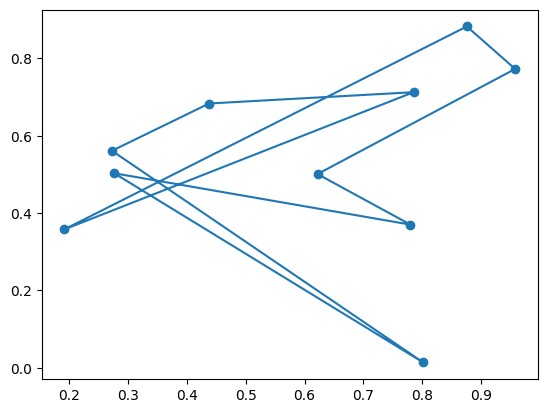

In [18]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pos_.append(pos_.head(1))
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [27]:
import numpy as np
from math import dist

# 🔹 Giả sử bạn đã có danh sách toạ độ các thành phố (từ file .tsp hoặc tự tạo)
# Nếu bạn chưa có, tạo thử 5 điểm ngẫu nhiên
np.random.seed(0)
coords = np.random.rand(5, 2) * 100  # 5 thành phố, tọa độ trong mặt phẳng 100x100

# 🔹 Tạo ma trận khoảng cách
def create_distance_matrix(coords):
    n = len(coords)
    d = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            d[i, j] = dist(coords[i], coords[j])
    return d

d = create_distance_matrix(coords)

print("📏 Ma trận khoảng cách (tương đương với d = tsp['dist'] trong R):")
print(d)

📏 Ma trận khoảng cách (tương đương với d = tsp['dist'] trong R):
[[ 0.   17.86 14.31 20.87 53.12]
 [17.86  0.   20.56 38.42 39.54]
 [14.31 20.56  0.   24.63 60.04]
 [20.87 38.42 24.63  0.   73.15]
 [53.12 39.54 60.04 73.15  0.  ]]


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep = 10` means 10 random restarts.

In [28]:
import numpy as np
from python_tsp.heuristics import solve_tsp_local_search

# Giả sử ma trận khoảng cách d đã có từ trước
# Nếu chưa có, có thể tạo ví dụ:
np.random.seed(0)
coords = np.random.rand(5, 2) * 100
d = np.sqrt(((coords[:, None, :] - coords[None, :, :]) ** 2).sum(axis=2))

# 🔹 Giải TSP bằng local search (tương tự solve_TSP trong R)
permutation, distance = solve_tsp_local_search(d)

print("🗺️ Tour tối ưu tìm được:")
print(permutation)
print(f"📏 Chiều dài tour: {distance:.2f}")

🗺️ Tour tối ưu tìm được:
[0, 3, 2, 1, 4]
📏 Chiều dài tour: 158.71


Tour length: 4.88


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


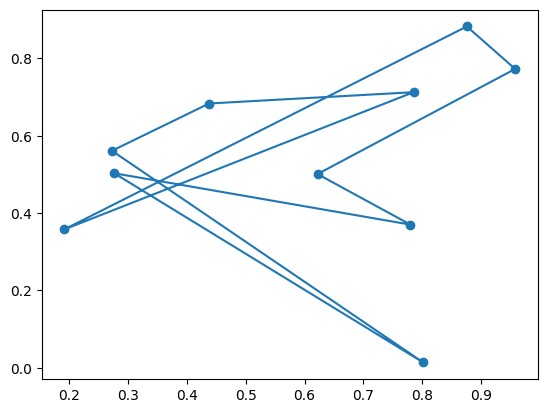

In [29]:
show_tsp(tsp, tour)

How long does it take to solve the problem?

In [31]:
import time
from itertools import permutations

def solve_tsp_bruteforce(tsp):
    n = len(tsp["dist"])
    best_tour = None
    best_length = float("inf")
    for perm in permutations(range(n)):
        length = tour_length(tsp, list(perm))
        if length < best_length:
            best_tour, best_length = list(perm), length
    return best_tour, best_length

# Benchmark tương đương microbenchmark của R
start = time.perf_counter()
tour, length = solve_tsp_bruteforce(tsp)
end = time.perf_counter()

print(f"Best tour length: {length:.4f}")
print(f"Execution time: {end - start:.4f} seconds")

Best tour length: 2.7636
Execution time: 27.5059 seconds


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Initial tour: [3, 5, 7, 2, 4, 8, 0, 6, 1, 9]
Initial length: 4.9992
Iteration 1: length = 4.1101
Iteration 2: length = 3.3683
Iteration 3: length = 3.1315
Iteration 4: length = 2.9996
Iteration 5: length = 2.9541
Iteration 6: length = 2.9015
Iteration 7: length = 2.8056

Stopped at iteration 8: local optimum found.

Final tour length: 2.8056 (after 8 iterations)
Tour length: 2.81


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


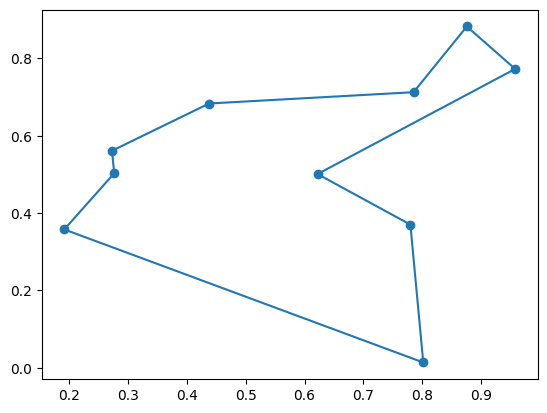

In [32]:
# Code goes here
def steepest_ascent_hill_climb(tsp, max_iterations=1000, verbose=True):
    """
    Thực hiện Steepest-Ascent Hill Climbing cho bài toán TSP.
    - Ở mỗi bước, duyệt tất cả các hoán đổi (local moves) giữa 2 thành phố trong tour.
    - Chọn hoán đổi giúp độ dài tour giảm nhiều nhất.
    - Nếu không còn cải thiện nào, dừng (đạt local optimum).
    """
    
    n = len(tsp["pos"])
    
    # Khởi tạo ngẫu nhiên 1 tour
    current_tour = random_tour(n)
    current_length = tour_length(tsp, current_tour)
    
    if verbose:
        print(f"Initial tour: {current_tour}")
        print(f"Initial length: {current_length:.4f}")
    
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        best_neighbor = None
        best_length = current_length
        
        # Duyệt tất cả các cặp hoán đổi (local moves)
        for i in range(n - 1):
            for j in range(i + 1, n):
                neighbor = current_tour.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                length = tour_length(tsp, neighbor)
                
                # Nếu tốt hơn, lưu lại
                if length < best_length:
                    best_length = length
                    best_neighbor = neighbor
        
        # Nếu không còn cải thiện, dừng
        if best_neighbor is None:
            if verbose:
                print(f"\nStopped at iteration {iteration}: local optimum found.")
            break
        
        # Cập nhật nghiệm hiện tại
        current_tour = best_neighbor
        current_length = best_length
        
        if verbose:
            print(f"Iteration {iteration}: length = {current_length:.4f}")
    
    return current_tour, current_length, iteration


# 🧪 Chạy thử
best_tour, best_length, iterations = steepest_ascent_hill_climb(tsp, max_iterations=500)
print(f"\nFinal tour length: {best_length:.4f} (after {iterations} iterations)")

# Hiển thị kết quả tour
show_tsp(tsp, best_tour)

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

Restart 1/5: best local length = 2.9212
Restart 2/5: best local length = 2.9212
Restart 3/5: best local length = 2.9212
Restart 4/5: best local length = 2.9212
Restart 5/5: best local length = 2.9212

Final best tour length after restarts: 2.9212
Tour length: 2.92


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


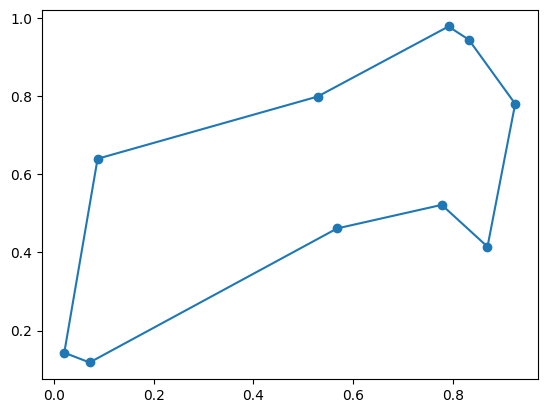

In [33]:
# Code goes here
import numpy as np
import random
import matplotlib.pyplot as plt

# --- HÀM HỖ TRỢ ---

def random_tour(n):
    """Sinh ngẫu nhiên một tour hợp lệ"""
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def tour_length(tsp, tour):
    """Tính độ dài tour"""
    dist = tsp["dist"]
    return sum(dist[tour[i], tour[(i+1) % len(tour)]] for i in range(len(tour)))

def generate_neighbors(tour):
    """Sinh tất cả các hoán vị khi đổi chỗ 2 thành phố"""
    neighbors = []
    n = len(tour)
    for i in range(n - 1):
        for j in range(i + 1, n):
            new_tour = tour.copy()
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
            neighbors.append(new_tour)
    return neighbors

def steepest_ascent_hill_climb(tsp, max_iterations=500):
    """Thuật toán leo đồi Steepest Ascent Hill Climbing"""
    current_tour = random_tour(len(tsp["dist"]))
    current_length = tour_length(tsp, current_tour)

    for _ in range(max_iterations):
        neighbors = generate_neighbors(current_tour)
        best_neighbor = min(neighbors, key=lambda t: tour_length(tsp, t))
        best_length = tour_length(tsp, best_neighbor)

        # Nếu không cải thiện nữa → dừng
        if best_length >= current_length:
            break

        current_tour, current_length = best_neighbor, best_length

    return current_tour, current_length


# --- PHIÊN BẢN RANDOM RESTARTS ---

def steepest_ascent_random_restarts(tsp, restarts=10, max_iterations=500):
    """Steepest-Ascent Hill Climbing với Random Restarts"""
    best_tour = None
    best_length = float("inf")

    for r in range(restarts):
        tour, length = steepest_ascent_hill_climb(tsp, max_iterations=max_iterations)
        print(f"Restart {r+1}/{restarts}: best local length = {length:.4f}")
        if length < best_length:
            best_tour, best_length = tour, length

    return best_tour, best_length


# --- CHẠY THỬ ---

tsp = random_tsp(10)
best_tour, best_length = steepest_ascent_random_restarts(tsp, restarts=5, max_iterations=300)

print(f"\nFinal best tour length after restarts: {best_length:.4f}")
show_tsp(tsp, best_tour)

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

Iteration 0: current length = 3.7357

Final tour length (Stochastic Hill Climbing): 2.5125
Tour length: 2.51


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


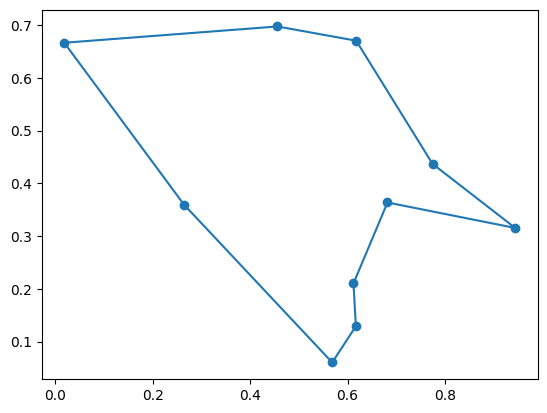

In [34]:
# Code goes here
import random
import numpy as np

def stochastic_hill_climb(tsp, max_iterations=500):
    """
    Stochastic Hill Climbing:
    - Ở mỗi bước, chọn ngẫu nhiên 1 hàng xóm tốt hơn (nếu có).
    - Nếu không còn hàng xóm tốt hơn thì dừng lại.
    """
    current_tour = random_tour(len(tsp["dist"]))
    current_length = tour_length(tsp, current_tour)

    for iteration in range(max_iterations):
        neighbors = generate_neighbors(current_tour)

        # Lọc các hàng xóm có độ dài tốt hơn
        better_neighbors = [n for n in neighbors if tour_length(tsp, n) < current_length]

        # Nếu không có hàng xóm nào tốt hơn -> dừng
        if not better_neighbors:
            break

        # Chọn ngẫu nhiên một hàng xóm tốt hơn
        chosen = random.choice(better_neighbors)
        current_tour = chosen
        current_length = tour_length(tsp, current_tour)

        if iteration % 50 == 0:
            print(f"Iteration {iteration}: current length = {current_length:.4f}")

    return current_tour, current_length


# --- CHẠY THỬ ---
tsp = random_tsp(10)
best_tour, best_length = stochastic_hill_climb(tsp, max_iterations=500)

print(f"\nFinal tour length (Stochastic Hill Climbing): {best_length:.4f}")
show_tsp(tsp, best_tour)

## Stochastic Hill Climbing (First-choice) [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

### Local Moves
I implement the following three different local move strategies: 
* Swap two random cities. 
* Swap two neighboring cities.
* Reverse the subtour between two cities.

In [35]:
def move_swap(tour):
    new_tour = tour.copy()
    
    # np.random.randint is inclusive lower limit and exclusive upper limit
    [a, b] = np.random.randint(0, len(tour), 2)
    #print(f"a={a}, b={b}")
    
    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap(list(range(10))))
print(move_swap(list(range(10))))
print(move_swap(list(range(10))))

[0, 1, 2, 3, 9, 5, 6, 7, 8, 4]
[0, 1, 2, 3, 6, 5, 4, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
def move_swap_neighbors(tour):
    new_tour = tour.copy()
    
    a = np.random.randint(0, len(tour)-1, 1)[0]
    if a > 0: b = a+1
    else: b = len(tour)-1  
    #print(f"a={a}, b={b}")
    
    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)

print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))
print(move_swap_neighbors(list(range(10))))

[0, 1, 2, 4, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 4, 6, 7, 8, 9]


In [37]:
def move_reverse(tour):
    new_tour = tour.copy()
    
    ab = np.random.randint(0, len(tour)+1, 2)
    ab.sort()
    #print(f"a={ab[0]}, b={ab[1]}")
        
    new_tour[ab[0]:ab[1]] = new_tour[ab[0]:ab[1]][::-1]
    return(new_tour)

print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))
print(move_reverse(list(range(10))))

[0, 1, 2, 3, 7, 6, 5, 4, 8, 9]
[0, 1, 2, 9, 8, 7, 6, 5, 4, 3]
[0, 1, 2, 3, 4, 6, 5, 7, 8, 9]


### Search Algorithm

I don't know what the optimal tour is so I run the algorithm for at most `max_steps` steps, and stop if there is no improvement for at least `stop_after` steps.

In [38]:
def FCSHC(tsp, tour = None, local_move_method = move_swap, 
         max_steps = 1000000, stop_after = 1000, verbose = True, keep_history = False):
    
    n = len(tsp['pos'])
    
    if keep_history: history = list() 
    
    # 1. initialize current tour
    # current tour = initial tour (random if no tour is given)
    if not tour is None:
        current_tour = tour
    else:
        current_tour = random_tour(n)
    
    
    # initial tour length
    current_length = tour_length(tsp, current_tour)    
    if verbose: print(f"initial tour length: {current_length}")
    
    # step when we last improved the length
    last_improvement_step = 0
    
    # 2. repeat local moves
    for step in range(max_steps):
        
        new_tour = local_move_method(current_tour)
        new_length = tour_length(tsp, new_tour)  
        
        # check if the new tour is better   
        if new_length < current_length: 
            current_tour = new_tour
            current_length = new_length
            last_improvement_step = step
            if verbose: print(f"step: {step} - new tour length: {current_length}")
    
        if keep_history: history.append(current_length)
    
        # stop if we did not improve for stop_after steps
        if step - last_improvement_step > stop_after: 
            if verbose: print(f"step: {step} - no improvement for {stop_after} steps.")
            break
    
    
    if keep_history: return(current_tour, history)
    return(current_tour)

### Comparison of Local Move Strategies Using a Single Problem

Tour length: 4.63


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


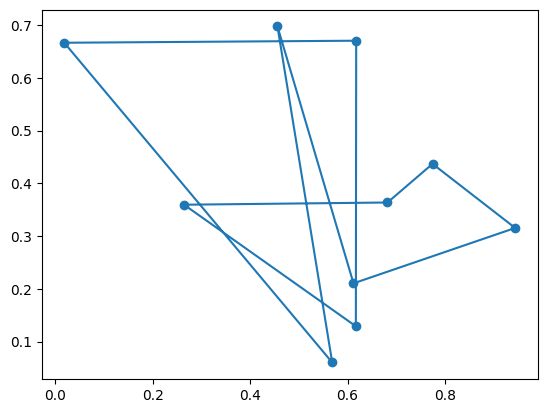

In [39]:
initial_tour = random_tour(len(tsp['pos']))
show_tsp(tsp, initial_tour)

initial tour length: 4.6308016553501865
step: 0 - new tour length: 4.432301153517346
step: 2 - new tour length: 4.272365423372272
step: 4 - new tour length: 4.212402717042929
step: 6 - new tour length: 4.052331515345953
step: 11 - new tour length: 3.8687090971493476
step: 23 - new tour length: 3.8659603598710657
step: 32 - new tour length: 3.8154086523815898
step: 53 - new tour length: 3.68251753397752
step: 58 - new tour length: 3.673770882467225
step: 59 - new tour length: 3.333943903372507
step: 88 - new tour length: 3.3276690993337117
step: 100 - new tour length: 2.97656145866796
step: 125 - new tour length: 2.851820720944014
step: 129 - new tour length: 2.6550390427131103
step: 142 - new tour length: 2.51247445334749
step: 1143 - no improvement for 1000 steps.
CPU times: total: 281 ms
Wall time: 289 ms
Tour length: 2.51


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


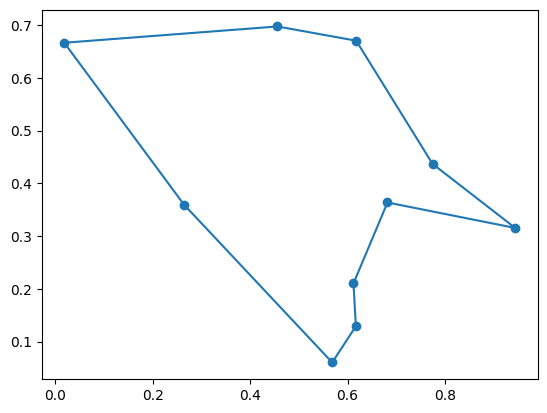

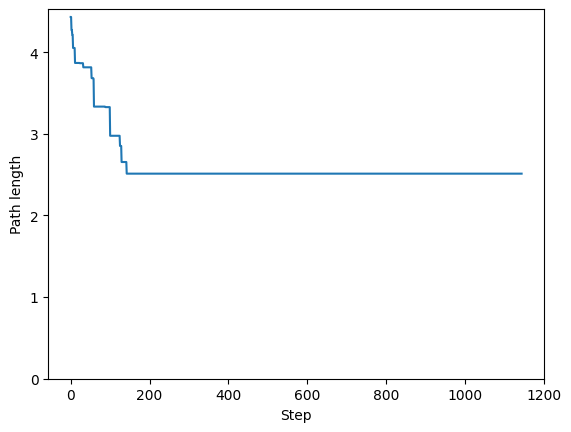

In [40]:
%time tour, history_swap = FCSHC(tsp, initial_tour, local_move_method = move_swap, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_swap)), history_swap)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

initial tour length: 4.6308016553501865
step: 0 - new tour length: 4.385992535397518
step: 1 - new tour length: 3.650685315665635
step: 2 - new tour length: 3.298817192127408
step: 4 - new tour length: 3.269162663598437
step: 21 - new tour length: 3.0574455960751576
step: 1022 - no improvement for 1000 steps.
CPU times: total: 93.8 ms
Wall time: 101 ms
Tour length: 3.06


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


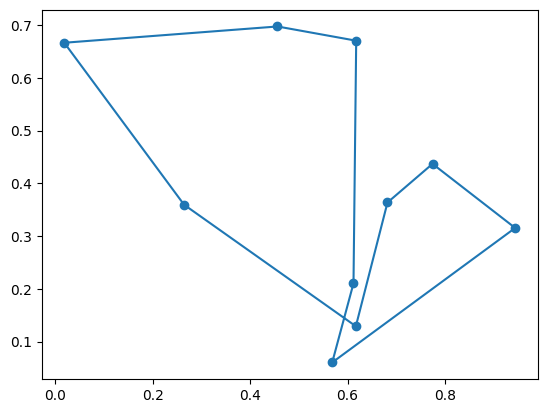

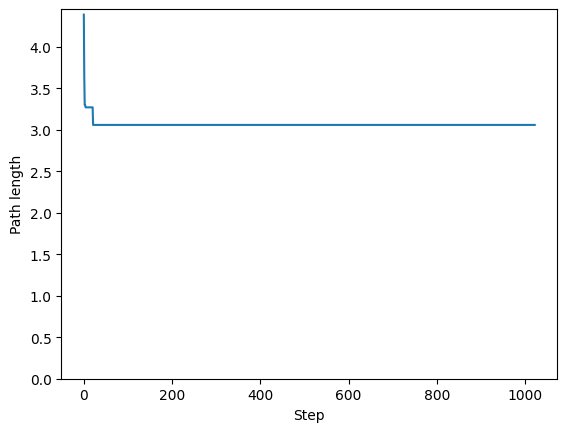

In [41]:
%time tour, history_swap_neighbors = FCSHC(tsp, initial_tour, local_move_method = move_swap_neighbors, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_swap_neighbors)), history_swap_neighbors)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

initial tour length: 4.6308016553501865
step: 2 - new tour length: 3.8687031639925387
step: 4 - new tour length: 3.604886551375135
step: 10 - new tour length: 2.8695793316432523
step: 16 - new tour length: 2.8165503817486153
step: 17 - new tour length: 2.6307255052930114
step: 1018 - no improvement for 1000 steps.
CPU times: total: 93.8 ms
Wall time: 103 ms
Tour length: 2.63


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


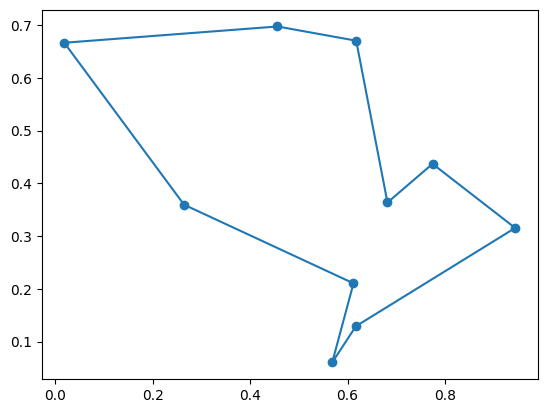

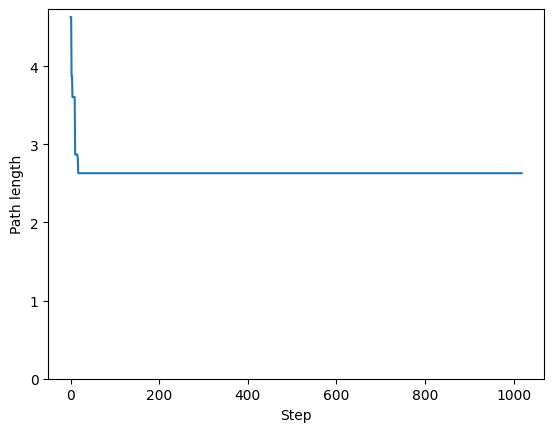

In [42]:
%time tour, history_reverse = FCSHC(tsp, initial_tour, local_move_method = move_reverse, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history_reverse)), history_reverse)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

All three learning curves

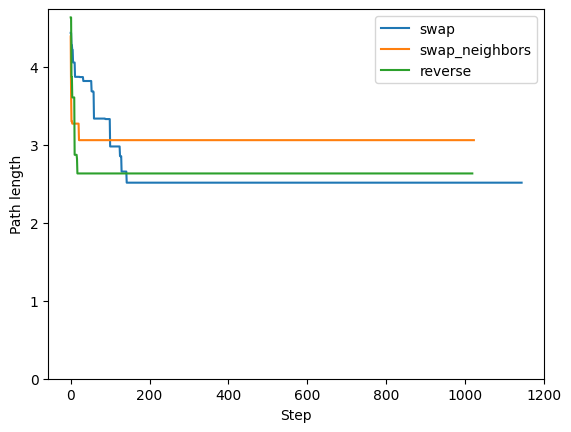

In [43]:
plt.plot(range(len(history_swap)), history_swap, label = "swap")
plt.plot(range(len(history_swap_neighbors)), history_swap_neighbors, label = "swap_neighbors")
plt.plot(range(len(history_reverse)), history_reverse, label = "reverse")
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.legend()
plt.show()

### Comparison of Local Move Strategies

We compare the local move strategies using 100 random problems.

In [44]:
N = 100 # replications
n = 20 # number of cities

results = { 
    'swap' : np.zeros(shape = [N]),
    'swap_neighbors' : np.zeros(shape = [N]),
    'reverse' : np.zeros(shape = [N]) 
}

for i in range(N):
    tsp_test = random_tsp(n)
    initial_tour = random_tour(n)
    
    results['swap'][i] = tour_length(tsp_test, 
        FCSHC(tsp_test, initial_tour, local_move_method = move_swap, verbose = False))
    
    results['swap_neighbors'][i] = tour_length(tsp_test, 
        FCSHC(tsp_test, initial_tour, local_move_method = move_swap_neighbors, verbose = False))
    
    results['reverse'][i] = tour_length(tsp_test, 
        FCSHC(tsp_test, initial_tour, local_move_method = move_reverse, verbose = False))

    swap  swap_neighbors  reverse
0   4.49            8.18     3.81
1   5.57            9.60     4.07
2   4.94            9.20     4.52
3   4.40            8.28     3.84
4   4.28            8.17     3.81
..   ...             ...      ...
95  4.99            8.37     3.64
96  4.60            8.09     4.13
97  4.14            7.07     3.94
98  3.96            8.57     4.39
99  4.04            9.15     3.77

[100 rows x 3 columns]
swap              4.66
swap_neighbors    8.13
reverse           3.99
dtype: float64


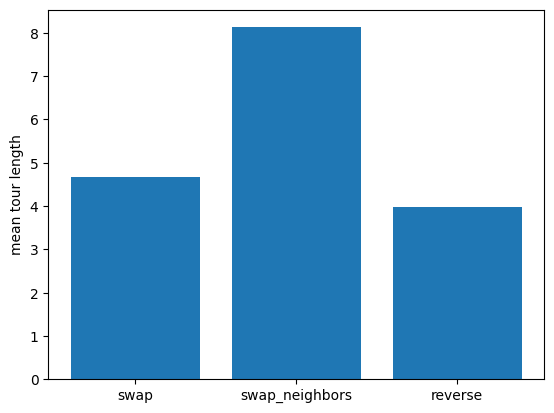

In [45]:
# compare averages
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame(results)
print(results)

means = np.mean(results, axis = 0)
print(means)

plt.bar(means.keys(), means)
plt.ylabel("mean tour length")
plt.show()


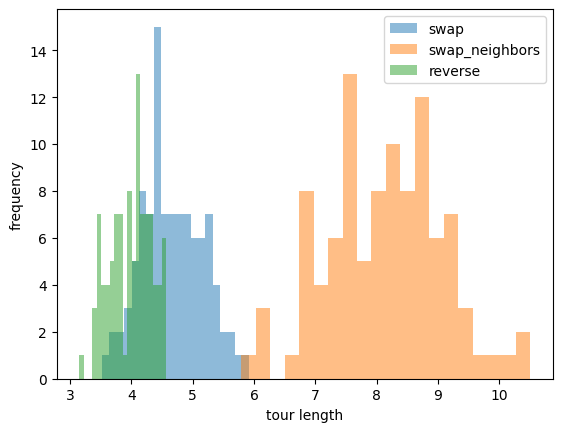

In [46]:
# histogram

plt.hist(results['swap'], bins = 20, alpha = .5)
plt.hist(results['swap_neighbors'], bins = 20, alpha = .5)
plt.hist(results['reverse'], bins = 20, alpha = .5)
plt.xlabel("tour length")
plt.ylabel("frequency")
plt.legend(labels = ["swap", "swap_neighbors", "reverse"])
plt.show()

<Axes: >

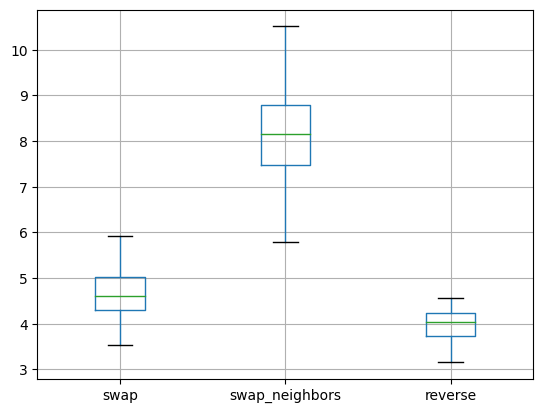

In [47]:
# boxplot (from pandas.DataFrame)

results.boxplot()

In [53]:
import numpy as np
from python_tsp.heuristics import solve_tsp_local_search

# Giả sử ma trận khoảng cách d đã có từ trước
# Nếu chưa có, có thể tạo ví dụ:
np.random.seed(0)
coords = np.random.rand(5, 2) * 100
d = np.sqrt(((coords[:, None, :] - coords[None, :, :]) ** 2).sum(axis=2))

# 🔹 Giải TSP bằng local search (tương tự solve_TSP trong R)
permutation, distance = solve_tsp_local_search(d)

print("🗺️ Tour tối ưu tìm được:")
print(permutation)
print(f"📏 Chiều dài tour: {distance:.2f}")

🗺️ Tour tối ưu tìm được:
[0, 3, 2, 1, 4]
📏 Chiều dài tour: 158.71


## Simulated Annealing [2 Points]

Simulated annealing is a form of stochastic hill climbing that also allows downhill moves with a probability proportional to the temperature. This is done to avoid local optima. The temperature is decreased in every iteration following an annealing schedule.

Finding a good cooling schedule for the problem is the most challenging part of simulated annealing. Some guidance can be found [here](http://what-when-how.com/artificial-intelligence/a-comparison-of-cooling-schedules-for-simulated-annealing-artificial-intelligence/).

The initial temperature $T_0$ should be chosen such that initially any move, no matter how bad, has a high probability of being performed. For $P = exp(-\Delta E/T_0)$ we get a probability of $exp(-1) = 0.37$ if $T_0$ is equal to the worst $\Delta E$. This is typically enough.

For the schedule, $T_t = T_0 \alpha^t$ is popular with $\alpha$ less but close to 1 and $t$ being the time step. Note that this is equivalent to multiplying the current temperature with $\alpha$ at every step.

In [54]:
def schedule(t, T0, alpha):
    return(T0 * alpha ** t)

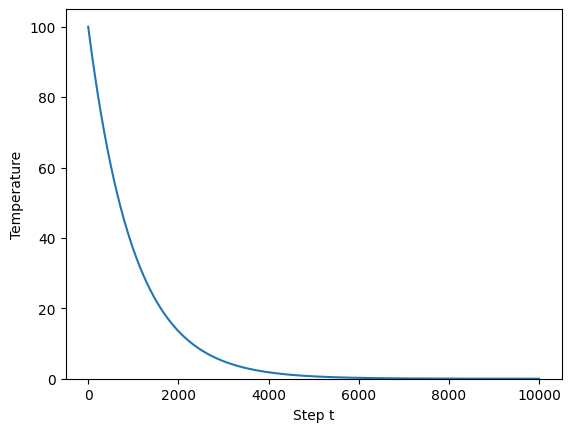

In [55]:
ts = range(0,10000)
plt.plot(ts, [schedule(t, 100, 0.999) for t in ts])
plt.xlabel("Step t")
plt.ylabel("Temperature")
plt.ylim(bottom = 0)
plt.show()

In [56]:
def SA(tsp, tour = None, local_move_method = move_reverse, 
         T0 = None, alpha = 0.999, epsilon = 1e-3, verbose = True, keep_history = False):
    
    n = len(tsp['pos'])
    
    if keep_history: history = list() 
    
    # 1. initialize current tour
    # current tour = initial tour (random if no tour is given)
    if not tour is None:
        current_tour = tour
    else:
        current_tour = random_tour(n)
    
    # initial tour length
    current_length = tour_length(tsp, current_tour)    
    if verbose: print(f"initial tour length: {current_length:3.3}")
    
    # use the worst case length. We use the maximal distance for each row of the distance matrix. 
    # This may not be a valid tour, but it is an upper limit for deltaE.
    if T0 is None:
        T0 = np.sum(np.amax(tsp["dist"], axis = 0))
    
    # 2. repeat local moves till temperature is low enough
    T = T0
    t = 0
    while T > epsilon:
        
        # calculate temperature from schedule
        T = schedule(t, T0, alpha)
        
        # create random move
        new_tour = local_move_method(current_tour)
        new_length = tour_length(tsp, new_tour)
        
        deltaE = new_length - current_length
        
        # check if the new tour is better   
        if deltaE < 0 or np.random.rand() < math.exp(-deltaE/T): 
            current_tour = new_tour
            current_length = new_length
            if verbose: print(f"step: {t} \t temp: {T:5.3f} \t deltaE: {deltaE:+3.3f} \t new tour length: {current_length:3.3f}")
      
        if keep_history: history.append(current_length)
    
        t += 1
    
    if keep_history: return(current_tour, history)
    return(current_tour)

CPU times: total: 9.12 s
Wall time: 9.37 s
Tour length: 2.51


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


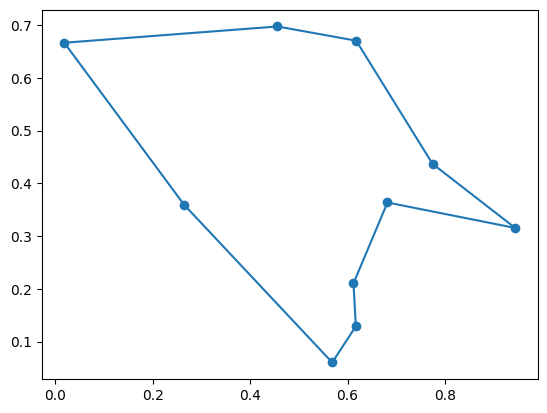

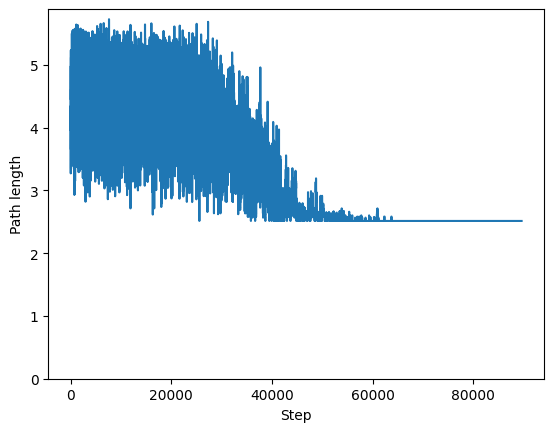

In [57]:
%time tour, history = SA(tsp, local_move_method = move_swap, alpha = 0.9999, verbose = False, keep_history = True)
show_tsp(tsp, tour)

plt.plot(range(len(history)), history)
plt.xlabel("Step")
plt.ylabel("Path length")
plt.ylim(bottom = 0)
plt.show()

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [60]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 1.997232437133789 milliseconds


Restart 1/5: best local length = 2.1411
Restart 2/5: best local length = 2.1411
Restart 3/5: best local length = 2.1411
Restart 4/5: best local length = 2.1411
Restart 5/5: best local length = 2.1411
Iteration 0: current length = 2.1860
initial tour length: 2.186043743258702
step: 2 - new tour length: 2.141116210060031
step: 1003 - no improvement for 1000 steps.
initial tour length: 2.186043743258702
step: 11 - new tour length: 2.1860437432587014
step: 12 - new tour length: 2.141116210060031
step: 1013 - no improvement for 1000 steps.
Restart 1/5: best local length = 1.9132
Restart 2/5: best local length = 1.9132
Restart 3/5: best local length = 1.9132
Restart 4/5: best local length = 1.9132
Restart 5/5: best local length = 1.9132
Iteration 0: current length = 2.0928
initial tour length: 2.57943678565029
step: 1 - new tour length: 2.1043756154270032
step: 2 - new tour length: 1.9132464989828768
step: 1003 - no improvement for 1000 steps.
initial tour length: 2.57943678565029
step: 0 - 

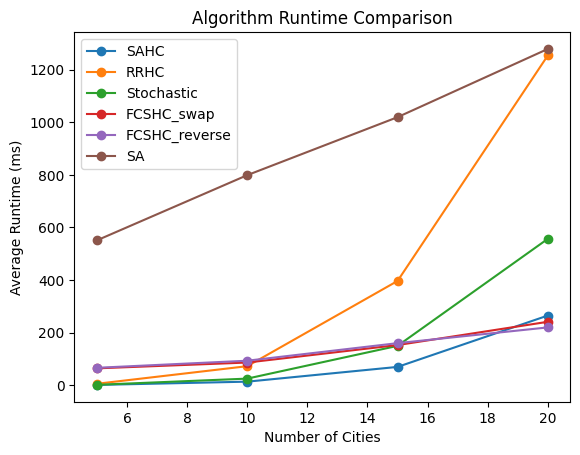

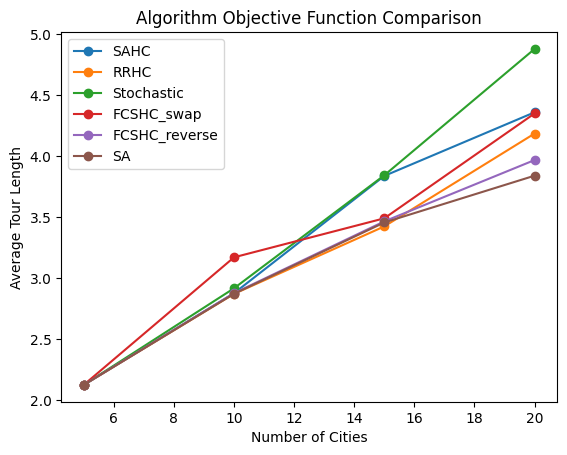

In [70]:
import time
import numpy as np
import pandas as pd

# --- Cấu hình thử nghiệm ---
city_sizes = [5, 10, 15, 20]   # các kích thước TSP khác nhau
algorithms = ['SAHC', 'RRHC', 'Stochastic', 'FCSHC_swap', 'FCSHC_reverse', 'SA']
repetitions = 5                # chạy mỗi cấu hình 5 lần để lấy trung bình

# --- DataFrame lưu kết quả ---
results = []

for n in city_sizes:
    for rep in range(repetitions):
        tsp_test = random_tsp(n)
        initial_tour = random_tour(n)

        # --- Steepest-Ascent Hill Climbing ---
        t0 = time.time()
        tour_sahc, length_sahc = steepest_ascent_hill_climb(tsp_test, max_iterations=500)
        t1 = time.time()
        results.append({'Algorithm': 'SAHC', 'Cities': n, 'Length': length_sahc, 'Time_ms': (t1-t0)*1e3})

        # --- Random-Restart Hill Climbing ---
        t0 = time.time()
        tour_rrhc, length_rrhc = steepest_ascent_random_restarts(tsp_test, restarts=5, max_iterations=300)
        t1 = time.time()
        results.append({'Algorithm': 'RRHC', 'Cities': n, 'Length': length_rrhc, 'Time_ms': (t1-t0)*1e3})

        # --- Stochastic Hill Climbing ---
        t0 = time.time()
        tour_stoch, length_stoch = stochastic_hill_climb(tsp_test, max_iterations=500)
        t1 = time.time()
        results.append({'Algorithm': 'Stochastic', 'Cities': n, 'Length': length_stoch, 'Time_ms': (t1-t0)*1e3})

        # --- FCSHC with swap ---
        t0 = time.time()
        tour_fcs_swap = FCSHC(tsp_test, initial_tour, local_move_method=move_swap)
        length_fcs_swap = tour_length(tsp_test, tour_fcs_swap)
        t1 = time.time()
        results.append({'Algorithm': 'FCSHC_swap', 'Cities': n, 'Length': length_fcs_swap, 'Time_ms': (t1-t0)*1e3})

        # --- FCSHC with reverse ---
        t0 = time.time()
        tour_fcs_rev = FCSHC(tsp_test, initial_tour, local_move_method=move_reverse)
        length_fcs_rev = tour_length(tsp_test, tour_fcs_rev)
        t1 = time.time()
        results.append({'Algorithm': 'FCSHC_reverse', 'Cities': n, 'Length': length_fcs_rev, 'Time_ms': (t1-t0)*1e3})

        # --- Simulated Annealing ---
        t0 = time.time()
        tour_sa = SA(tsp_test, tour=initial_tour, local_move_method=move_reverse, alpha=0.999, verbose=False)
        length_sa = tour_length(tsp_test, tour_sa)
        t1 = time.time()
        results.append({'Algorithm': 'SA', 'Cities': n, 'Length': length_sa, 'Time_ms': (t1-t0)*1e3})

# --- Chuyển kết quả sang DataFrame ---
df_results = pd.DataFrame(results)

# --- Tóm tắt trung bình theo thuật toán và số thành phố ---
summary = df_results.groupby(['Cities', 'Algorithm']).agg({'Length': 'mean', 'Time_ms': 'mean'}).reset_index()
print(summary)

# --- Vẽ biểu đồ so sánh runtime ---
import matplotlib.pyplot as plt
for alg in algorithms:
    subset = summary[summary['Algorithm'] == alg]
    plt.plot(subset['Cities'], subset['Time_ms'], marker='o', label=alg)
plt.xlabel("Number of Cities")
plt.ylabel("Average Runtime (ms)")
plt.title("Algorithm Runtime Comparison")
plt.legend()
plt.show()

# --- Vẽ biểu đồ so sánh tour length ---
for alg in algorithms:
    subset = summary[summary['Algorithm'] == alg]
    plt.plot(subset['Cities'], subset['Length'], marker='o', label=alg)
plt.xlabel("Number of Cities")
plt.ylabel("Average Tour Length")
plt.title("Algorithm Objective Function Comparison")
plt.legend()
plt.show()

## Bonus: Genetic Algorithm [+1 Point]

Generation 0: Best tour length = 3.8515
Generation 50: Best tour length = 2.7525
Generation 100: Best tour length = 2.7525
Generation 150: Best tour length = 2.7525
Generation 200: Best tour length = 2.7525
Generation 250: Best tour length = 2.7525
Generation 300: Best tour length = 2.7525
Generation 350: Best tour length = 2.7525
Generation 400: Best tour length = 2.7525
Generation 450: Best tour length = 2.7525

Genetic Algorithm result:
Best tour: [9, 4, 1, 0, 5, 2, 8, 3, 7, 6]
Tour length: 2.7525
Tour length: 2.75


C:\Users\Admin\AppData\Local\Temp\ipykernel_31732\485338383.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_ = pos_.append(pos_.head(1))


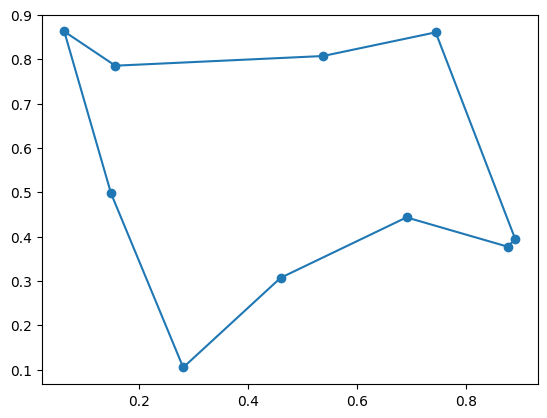

In [71]:
# Code goes here
import random
import numpy as np

# --- Helper functions ---

def create_population(n_cities, pop_size=50):
    """Tạo population ban đầu gồm các tour ngẫu nhiên"""
    return [random.sample(range(n_cities), n_cities) for _ in range(pop_size)]

def tournament_selection(population, tsp, k=3):
    """Chọn cá thể tốt nhất trong k cá thể ngẫu nhiên"""
    selected = random.sample(population, k)
    selected.sort(key=lambda tour: tour_length(tsp, tour))
    return selected[0]

def ordered_crossover(parent1, parent2):
    """Ordered crossover (OX) cho TSP"""
    n = len(parent1)
    a, b = sorted(random.sample(range(n), 2))
    child = [None]*n
    # copy slice từ parent1
    child[a:b+1] = parent1[a:b+1]
    # điền phần còn lại từ parent2 theo thứ tự
    ptr = 0
    for city in parent2:
        if city not in child:
            while child[ptr] is not None:
                ptr += 1
            child[ptr] = city
    return child

def swap_mutation(tour, mutation_rate=0.1):
    """Đổi chỗ 2 thành phố với xác suất mutation_rate"""
    tour = tour.copy()
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

# --- Genetic Algorithm ---
def genetic_algorithm(tsp, pop_size=50, generations=500, mutation_rate=0.1, verbose=True):
    n_cities = len(tsp['pos'])
    
    # 1. Initialize population
    population = create_population(n_cities, pop_size)
    
    best_tour = min(population, key=lambda t: tour_length(tsp, t))
    best_length = tour_length(tsp, best_tour)
    
    for gen in range(generations):
        new_population = []
        
        # 2. Generate new population
        while len(new_population) < pop_size:
            # Selection
            parent1 = tournament_selection(population, tsp)
            parent2 = tournament_selection(population, tsp)
            # Crossover
            child = ordered_crossover(parent1, parent2)
            # Mutation
            child = swap_mutation(child, mutation_rate)
            new_population.append(child)
        
        population = new_population
        
        # Update best solution
        current_best = min(population, key=lambda t: tour_length(tsp, t))
        current_length = tour_length(tsp, current_best)
        if current_length < best_length:
            best_tour, best_length = current_best, current_length
        
        if verbose and gen % 50 == 0:
            print(f"Generation {gen}: Best tour length = {best_length:.4f}")
    
    return best_tour, best_length

# --- Test Genetic Algorithm ---
tsp_test = random_tsp(10)
best_tour_ga, best_length_ga = genetic_algorithm(tsp_test, pop_size=50, generations=500, mutation_rate=0.1)
print("\nGenetic Algorithm result:")
print(f"Best tour: {best_tour_ga}")
print(f"Tour length: {best_length_ga:.4f}")

# --- Visualize result ---
show_tsp(tsp_test, best_tour_ga)
